# Cyclistic Bike Share: A Case Study
## Author: Ammish Tandon
## Date: 07/07/2021
## Introduction
**Cyclistic** is a fictional bike - share company in Chicago. It has a bike - share program that features more than 5,800 bicycles and 600 docking stations. It also offers reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The bikes can be unlocked from one station and returned to any other station in the system anytime.  
It has 3 pricing plans:  
* Single - Ride Passes
* Full - Day Passes
* Annual Memberships  
Customers who purchase single-ride or full-day passes are referred to as **casual riders**. Customers who purchase annual memberships are **Cyclistic members**.  
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.  

## Ask Phase

#### **Ultimate Goal**: Design marketing strategies aimed at converting casual riders into annual members.
#### **Business Task** (Assigned to me): To determine how annual members and casual riders use Cyclistic bikes differently.  
### Key Stakeholders:  
* **Primary Stakeholders** - Lily Moreno, Manager and Director of Marketing and Cyclistic Marketing Analytics Team
* **Secondary Stakeholders** - Cyclistic Executive Team  
 
## Prepare Phase
**Data Source**  
The data consists of the most recent 12 months of Cyclistic trip data available from June 2020 - May 2021. As Cyclistic is a fictional company, I have used Divvy's tripdata. To download the dataset, click here [link](https://divvy-tripdata.s3.amazonaws.com/index.html)

In [1]:
# Setting up my environment
library(tidyverse)
library(lubridate)
library(skimr)
library(janitor)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
# Loading all the data in a data frame
tripdata_202006 <- read_csv("../input/cyclistic-trip-data/202006-divvy-tripdata.csv")
tripdata_202007 <- read_csv("../input/cyclistic-trip-data/202007-divvy-tripdata.csv")
tripdata_202008 <- read_csv("../input/cyclistic-trip-data/202008-divvy-tripdata.csv")
tripdata_202009 <- read_csv("../input/cyclistic-trip-data/202009-divvy-tripdata.csv")
tripdata_202010 <- read_csv("../input/cyclistic-trip-data/202010-divvy-tripdata.csv")
tripdata_202011 <- read_csv("../input/cyclistic-trip-data/202011-divvy-tripdata.csv")
tripdata_202012 <- read_csv("../input/cyclistic-trip-data/202012-divvy-tripdata.csv")
tripdata_202101 <- read_csv("../input/cyclistic-trip-data/202101-divvy-tripdata.csv")
tripdata_202102 <- read_csv("../input/cyclistic-trip-data/202102-divvy-tripdata.csv")
tripdata_202103 <- read_csv("../input/cyclistic-trip-data/202103-divvy-tripdata.csv")
tripdata_202104 <- read_csv("../input/cyclistic-trip-data/202104-divvy-tripdata.csv")
tripdata_202105 <- read_csv("../input/cyclistic-trip-data/202105-divvy-tripdata.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = 

To get familiar with the dataset, I'll use the head() function.

In [3]:
head(tripdata_202006)
head(tripdata_202007)
head(tripdata_202008)
head(tripdata_202009)
head(tripdata_202010)
head(tripdata_202011)
head(tripdata_202012)
head(tripdata_202101)
head(tripdata_202102)
head(tripdata_202103)
head(tripdata_202104)
head(tripdata_202105)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.94018,-87.65304,41.93193,-87.67786,casual
9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.87208,-87.62954,41.88424,-87.62963,member
F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.88424,-87.62963,41.87405,-87.62772,member
C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.94553,-87.64644,41.97835,-87.65975,casual
4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.92154,-87.65382,41.94018,-87.65304,casual
D50DF288196B53BE,docked_bike,2020-06-17 18:07:18,2020-06-17 18:18:14,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.92154,-87.65382,41.94018,-87.65304,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.90687,-87.62622,41.90672,-87.63483,member
BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.94367,-87.64895,41.98404,-87.66027,member
D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.93259,-87.63643,41.93650,-87.64754,casual
54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.89076,-87.63170,41.91831,-87.63628,casual
54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.91172,-87.62680,41.90799,-87.63150,member
65636B619E24257F,docked_bike,2020-07-28 16:33:03,2020-07-28 16:49:10,Fairbanks St & Superior St,635,Wells St & Concord Ln,289,41.89575,-87.62010,41.91213,-87.63466,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.93259,-87.63643,41.91569,-87.63460,member
2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.86438,-87.62368,41.86422,-87.62344,casual
67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.88464,-87.61955,41.88497,-87.62757,casual
C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.88409,-87.62964,41.88958,-87.62754,casual
13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.90299,-87.68377,41.90300,-87.68384,casual
56349A5A42F0AE51,electric_bike,2020-08-27 17:26:23,2020-08-27 18:07:50,Leavitt St & Division St,658,Leavitt St & Division St,658,41.90302,-87.68373,41.90309,-87.68363,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2B22BD5F95FB2629,electric_bike,2020-09-17 14:27:11,2020-09-17 14:44:24,Michigan Ave & Lake St,52,Green St & Randolph St,112,41.88669,-87.62356,41.88357,-87.64873,casual
A7FB70B4AFC6CAF2,electric_bike,2020-09-17 15:07:31,2020-09-17 15:07:45,W Oakdale Ave & N Broadway,NA,W Oakdale Ave & N Broadway,NA,41.94000,-87.64000,41.94000,-87.64000,casual
86057FA01BAC778E,electric_bike,2020-09-17 15:09:04,2020-09-17 15:09:35,W Oakdale Ave & N Broadway,NA,W Oakdale Ave & N Broadway,NA,41.94000,-87.64000,41.94000,-87.64000,casual
57F6DC9A153DB98C,electric_bike,2020-09-17 18:10:46,2020-09-17 18:35:49,Ashland Ave & Belle Plaine Ave,246,Montrose Harbor,249,41.95606,-87.66892,41.96398,-87.63822,casual
B9C4712F78C1AE68,electric_bike,2020-09-17 15:16:13,2020-09-17 15:52:55,Fairbanks Ct & Grand Ave,24,Fairbanks Ct & Grand Ave,24,41.89186,-87.62101,41.89135,-87.62032,casual
378BBCE1E444EB80,electric_bike,2020-09-17 18:37:04,2020-09-17 19:23:28,Clark St & Armitage Ave,94,NA,NA,41.91826,-87.63636,41.88000,-87.62000,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.92610,-87.63898,41.89035,-87.62607,casual
DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.94817,-87.66391,41.92953,-87.70782,casual
B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.77346,-87.58537,41.79145,-87.60005,casual
44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.95085,-87.65924,41.95281,-87.65010,casual
10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.92886,-87.66396,41.91778,-87.69143,casual
DA6C3759660133DA,electric_bike,2020-10-29 17:38:04,2020-10-29 17:45:43,Larrabee St & Division St,359,Wells St & Huron St,53,41.90353,-87.64335,41.89440,-87.63431,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.89418,-87.62913,41.89443,-87.62338,casual
96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.89096,-87.63534,41.90067,-87.66248,casual
C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.88098,-87.61675,41.87205,-87.62955,casual
E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.89550,-87.68201,41.91774,-87.69139,casual
1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.87650,-87.62036,41.87645,-87.62034,casual
7259585D8276D338,electric_bike,2020-11-14 15:55:17,2020-11-14 16:44:38,Wabash Ave & 16th St,72,Lake Shore Dr & Monroe St,76,41.86029,-87.62581,41.88099,-87.61677,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.87773,-87.65479,41.88872,-87.64445,member
158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,NA,NA,NA,NA,41.93000,-87.70000,41.91000,-87.70000,member
5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,NA,NA,NA,NA,41.91000,-87.69000,41.93000,-87.70000,member
BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,NA,NA,NA,NA,41.92000,-87.70000,41.91000,-87.70000,member
69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,NA,NA,NA,NA,41.80000,-87.59000,41.80000,-87.59000,member
C1DECC4AB488831C,electric_bike,2020-12-22 13:26:37,2020-12-22 13:34:50,NA,NA,NA,NA,41.80000,-87.59000,41.78000,-87.60000,member


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NA,NA,41.90034,-87.69674,41.89,-87.72,member
DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NA,NA,41.90033,-87.69671,41.90,-87.69,member
EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NA,NA,41.90031,-87.69664,41.90,-87.70,member
4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NA,NA,41.90040,-87.69666,41.92,-87.69,member
BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NA,NA,41.90033,-87.69670,41.90,-87.70,casual
5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NA,NA,41.90041,-87.69676,41.94,-87.71,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.01270,-87.66606,42.00458,-87.66141,member
0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.01270,-87.66606,42.01954,-87.66956,casual
E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.88579,-87.63110,41.88487,-87.62750,member
B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member
83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.83473,-87.62583,41.83816,-87.64512,member
BDAA7E3494E8D545,electric_bike,2021-02-24 15:43:33,2021-02-24 15:49:05,Fairbanks St & Superior St,18003,LaSalle Dr & Huron St,KP1705001026,41.89581,-87.62025,41.89489,-87.63198,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.91751,-87.70181,41.91774,-87.69139,casual
30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.91751,-87.70181,41.91417,-87.71676,casual
846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.84273,-87.63549,41.83066,-87.64717,casual
994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.96881,-87.65766,41.95283,-87.64999,casual
DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.01270,-87.66606,42.05049,-87.67782,casual
CEBA8516FD17F8D8,classic_bike,2021-03-20 11:08:47,2021-03-20 11:29:39,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.01270,-87.66606,42.05049,-87.67782,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,NA,NA,NA,NA,41.90,-87.63,41.89,-87.61,casual
DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,NA,NA,NA,NA,41.88,-87.62,41.79,-87.58,casual
0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,NA,NA,NA,NA,41.92,-87.70,41.92,-87.70,casual
7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,NA,NA,NA,NA,41.92,-87.70,41.94,-87.69,casual
853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,NA,NA,NA,NA,41.94,-87.69,41.94,-87.70,casual
F5E63DFD96B2A737,electric_bike,2021-05-30 11:33:41,2021-05-30 11:57:17,NA,NA,NA,NA,41.88,-87.63,41.89,-87.62,casual


All the data frames are structured and are in the wide format. We can see that each data frame has 13 columns and several thousand rows. The column names in each data frame are the same but there is some inconsistency in the data types of few columns in some data frames and there are some missing values as well which we'll correct in the **Process** phase.
The data is Reliable. It can be validated from the original source [link](https://divvy-tripdata.s3.amazonaws.com/index.html). It is comprehensive and has all the information required to solve the business task. It is current as it has the most recent 12 month data available (Till May 2021). It is cited by **Motivate International Inc.** (provider of this data) under this [license](https://www.divvybikes.com/data-license-agreement). 
Hence, the data is credible. The data doesn't contain any Personally Identifiable Information (PII) hence it takes care of the privacy of our riders.  

## Process Phase  
#### Data Cleaning and Manipulation
As seen earlier, the data type of the start_station_id and end_station_id in the data frames of June 2020 (202006_tripdata) - November 2020 (202011_tripdata) are formatted as double while the rest are formatted as character. All of them should be formatted as character for consistency throughout the data frames so that we can combine/stack them together. Also, we don't have to do any calculations using them so no need to format them as double.

In [4]:
tripdata_202006 <- mutate(tripdata_202006, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_202007 <- mutate(tripdata_202007, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_202008 <- mutate(tripdata_202008, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))         
tripdata_202009 <- mutate(tripdata_202009, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_202010 <- mutate(tripdata_202010, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))                                              
tripdata_202011 <- mutate(tripdata_202011, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))          

**Stacking all the data frames into one big data frame:**

In [5]:
all_trips <- bind_rows(tripdata_202006, tripdata_202007, tripdata_202008, tripdata_202009, tripdata_202010, tripdata_202011, tripdata_202012, tripdata_202101, tripdata_202102, tripdata_202103, tripdata_202104, tripdata_202105)

To remove empty cells, I'll use the **drop_na()** function

In [6]:
all_trips <- drop_na(all_trips)

In [7]:
# Inspecting the new data frame created
colnames(all_trips)    # column names in the data frame
nrow(all_trips)           # number of rows in the data frame
dim(all_trips)            # dimensions of the data frame
head(all_trips)
str(all_trips)
summary(all_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 3759262

[1] 3759262      13

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.94018,-87.65304,41.93193,-87.67786,casual
9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.87208,-87.62954,41.88424,-87.62963,member
F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.88424,-87.62963,41.87405,-87.62772,member
C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.94553,-87.64644,41.97835,-87.65975,casual
4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.92154,-87.65382,41.94018,-87.65304,casual
D50DF288196B53BE,docked_bike,2020-06-17 18:07:18,2020-06-17 18:18:14,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.92154,-87.65382,41.94018,-87.65304,casual


tibble [3,759,262 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3759262] "8CD5DE2C2B6C4CFC" "9A191EB2C751D85D" "F37D14B0B5659BCF" "C41237B506E85FA1" ...
 $ rideable_type     : chr [1:3759262] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3759262], format: "2020-06-13 23:24:48" "2020-06-26 07:26:10" ...
 $ ended_at          : POSIXct[1:3759262], format: "2020-06-13 23:36:55" "2020-06-26 07:31:58" ...
 $ start_station_name: chr [1:3759262] "Wilton Ave & Belmont Ave" "Federal St & Polk St" "Daley Center Plaza" "Broadway & Cornelia Ave" ...
 $ start_station_id  : chr [1:3759262] "117" "41" "81" "303" ...
 $ end_station_name  : chr [1:3759262] "Damen Ave & Clybourn Ave" "Daley Center Plaza" "State St & Harrison St" "Broadway & Berwyn Ave" ...
 $ end_station_id    : chr [1:3759262] "163" "81" "5" "294" ...
 $ start_lat         : num [1:3759262] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:3759262] -87.7 -87.6 -87.

   ride_id          rideable_type        started_at                 
 Length:3759262     Length:3759262     Min.   :2020-06-03 05:59:59  
 Class :character   Class :character   1st Qu.:2020-08-03 17:04:43  
 Mode  :character   Mode  :character   Median :2020-09-23 18:23:39  
                                       Mean   :2020-11-02 07:08:28  
                                       3rd Qu.:2021-03-04 20:15:30  
                                       Max.   :2021-05-31 23:59:16  
    ended_at                   start_station_name start_station_id  
 Min.   :2020-06-03 06:03:37   Length:3759262     Length:3759262    
 1st Qu.:2020-08-03 17:27:52   Class :character   Class :character  
 Median :2020-09-23 18:44:27   Mode  :character   Mode  :character  
 Mean   :2020-11-02 07:33:06                                        
 3rd Qu.:2021-03-04 20:26:50                                        
 Max.   :2021-06-10 22:17:11                                        
 end_station_name   end_station_id

In [8]:
# We'll add columns that list the date, month, day and year of each ride to aggregate ride data for each month, day or year
all_trips <- all_trips %>%
    mutate(date = as_date(started_at), day = format(as_date(started_at), "%d"), month = format(as_date(started_at), "%m"), year = format(as_date(started_at), "%Y"), day_of_week = format(as_date(started_at), "%A"))
# We'll also add a trip duration column
all_trips <- all_trips %>%
    mutate(trip_duration = difftime(ended_at, started_at))

In [9]:
str(all_trips) # Inspecting the structure of columns

tibble [3,759,262 × 19] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3759262] "8CD5DE2C2B6C4CFC" "9A191EB2C751D85D" "F37D14B0B5659BCF" "C41237B506E85FA1" ...
 $ rideable_type     : chr [1:3759262] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3759262], format: "2020-06-13 23:24:48" "2020-06-26 07:26:10" ...
 $ ended_at          : POSIXct[1:3759262], format: "2020-06-13 23:36:55" "2020-06-26 07:31:58" ...
 $ start_station_name: chr [1:3759262] "Wilton Ave & Belmont Ave" "Federal St & Polk St" "Daley Center Plaza" "Broadway & Cornelia Ave" ...
 $ start_station_id  : chr [1:3759262] "117" "41" "81" "303" ...
 $ end_station_name  : chr [1:3759262] "Damen Ave & Clybourn Ave" "Daley Center Plaza" "State St & Harrison St" "Broadway & Berwyn Ave" ...
 $ end_station_id    : chr [1:3759262] "163" "81" "5" "294" ...
 $ start_lat         : num [1:3759262] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:3759262] -87.7 -87.6 -87.

In [10]:
# To convert trip_duration to numeric
is.numeric(all_trips$trip_duration)       # FALSE
all_trips$trip_duration <- as.numeric(as.character(all_trips$trip_duration))
is.numeric(all_trips$trip_duration)       # TRUE

[1] FALSE

[1] TRUE

In [11]:
# Removing entries from the data frame when bikes were taken out of docks and checked for quality by Divvy or trip_duration was negative
all_trips_v2 <- subset(all_trips, start_station_name != "HQ QR" & trip_duration > 0)

## Analyze Phase
**Calculating Summary Statistics and performing some calculations to identify trends and relationships:**

In [12]:
# Calculating Summary Statistics of Trip Duration for each Customer Type: Member and Casual
all_trips_v2 %>% group_by(member_casual) %>%
    summarize(mean_trip_duration = mean(trip_duration), median_trip_duration = median(trip_duration), max_trip_duration = max(trip_duration), min_trip_duration = min(trip_duration))

member_casual,mean_trip_duration,median_trip_duration,max_trip_duration,min_trip_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,2605.8049,1248,3257001,1
member,917.0302,671,2476260,1


We can see that **Casual** riders use Cyclistic bikes for a longer period than Cyclistic **Members**.

In [13]:
# Average Trip Duration and number of trips by each day for members vs casual riders.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday",
"Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))                 # Arranging the days of the week
all_trips_v2 %>% group_by(member_casual, day_of_week) %>%
    summarize(mean_trip_duration = mean(trip_duration), number_of_trips = n(), .groups = "drop")

member_casual,day_of_week,mean_trip_duration,number_of_trips
<chr>,<ord>,<dbl>,<int>
casual,Sunday,2977.1620,307092
casual,Monday,2576.4366,171917
casual,Tuesday,2319.1585,159322
casual,Wednesday,2347.9601,166644
casual,Thursday,2448.0041,175350
casual,Friday,2475.4596,225957
casual,Saturday,2705.5541,368608
member,Sunday,1040.6617,284147
member,Monday,876.4077,291016


Average trip duration is higher during the weekends as compared to weekdays. Casual riders use bike for longer durations on an average as compared to the Cyclistic members.  
The number of trips by casual riders see a sharp decline during the weekdays as compared to the weekends.  
The number of trips by members is much higher during the weekdays as compared to that of casual riders and show little increments as weekends approach as compared to the casual riders where there is a sharp increase in the number of trips during the weekend.

In [14]:
# Bike preference: Members vs Casual
all_trips_v2 %>% group_by(member_casual, rideable_type) %>%
    summarize(number_of_trips = n(), .groups = "drop")

member_casual,rideable_type,number_of_trips
<chr>,<chr>,<int>
casual,classic_bike,264398
casual,docked_bike,1069164
casual,electric_bike,241328
member,classic_bike,576650
member,docked_bike,1258224
member,electric_bike,338969


The Docked Bike is the most prefered among both casual riders and members.

In [15]:
# Number of trips by Members and Casual Riders each month
all_trips_v2 %>% group_by(member_casual, month)%>%
    summarize(number_of_trips = n(), .groups = "drop") %>%
    arrange(month)
    

member_casual,month,number_of_trips
<chr>,<chr>,<int>
casual,01,14690
member,01,68818
casual,02,8613
member,02,34381
casual,03,75641
member,03,130046
casual,04,120418
member,04,177781
casual,05,216823


In [16]:
# Number of casual riders and members
all_trips_v2 %>% group_by(member_casual) %>% summarize(count = n())

member_casual,count
<chr>,<int>
casual,1574890
member,2173843


## Share Phase  
Now let's create some compelling visuals for the above analysis to make it more accessible to the audience and to share our findings in an easy way.

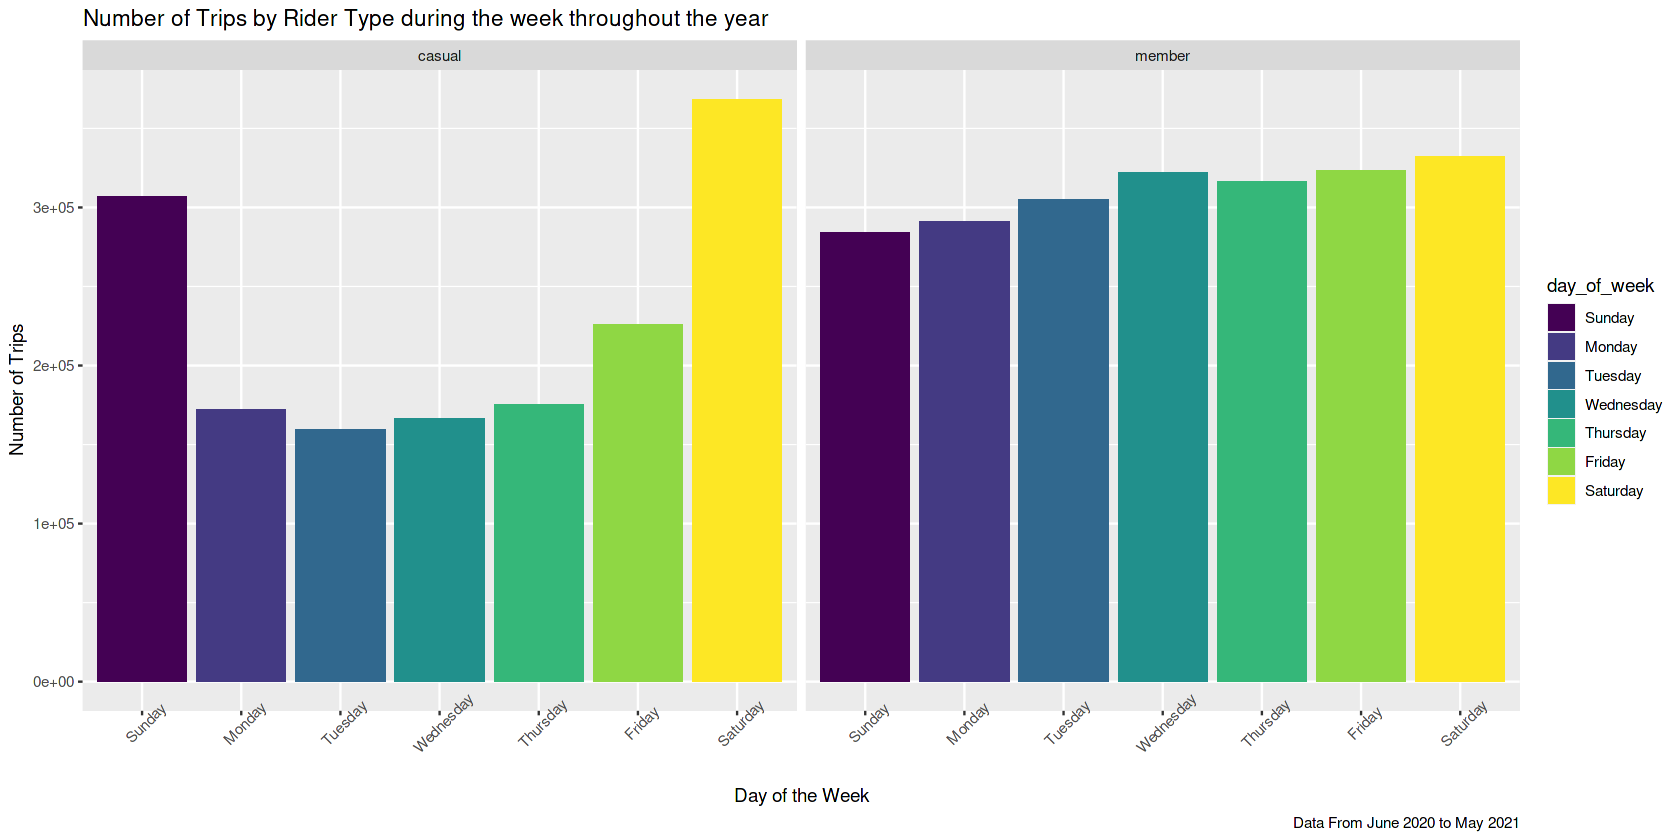

In [17]:
# Creating separate bar charts for members and casual riders denoting the number of trips taken by each in a week throughout the year
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }
set_plot_dimensions(14, 7)
ggplot(data = all_trips_v2) + geom_bar(mapping = aes(x = day_of_week, fill = day_of_week)) + facet_wrap(~member_casual) +
theme(axis.text.x = element_text(angle = 45)) + labs(title = "Number of Trips by Rider Type during the week throughout the year", caption = "Data From June 2020 to May 2021", x = "Day of the Week", y = "Number of Trips") 


We can clearly see that there is a high demand among casual riders during weekend which sharply declines during the weekday while Cyclistic members have a steady increase in demand with a little decrease on Thursday.

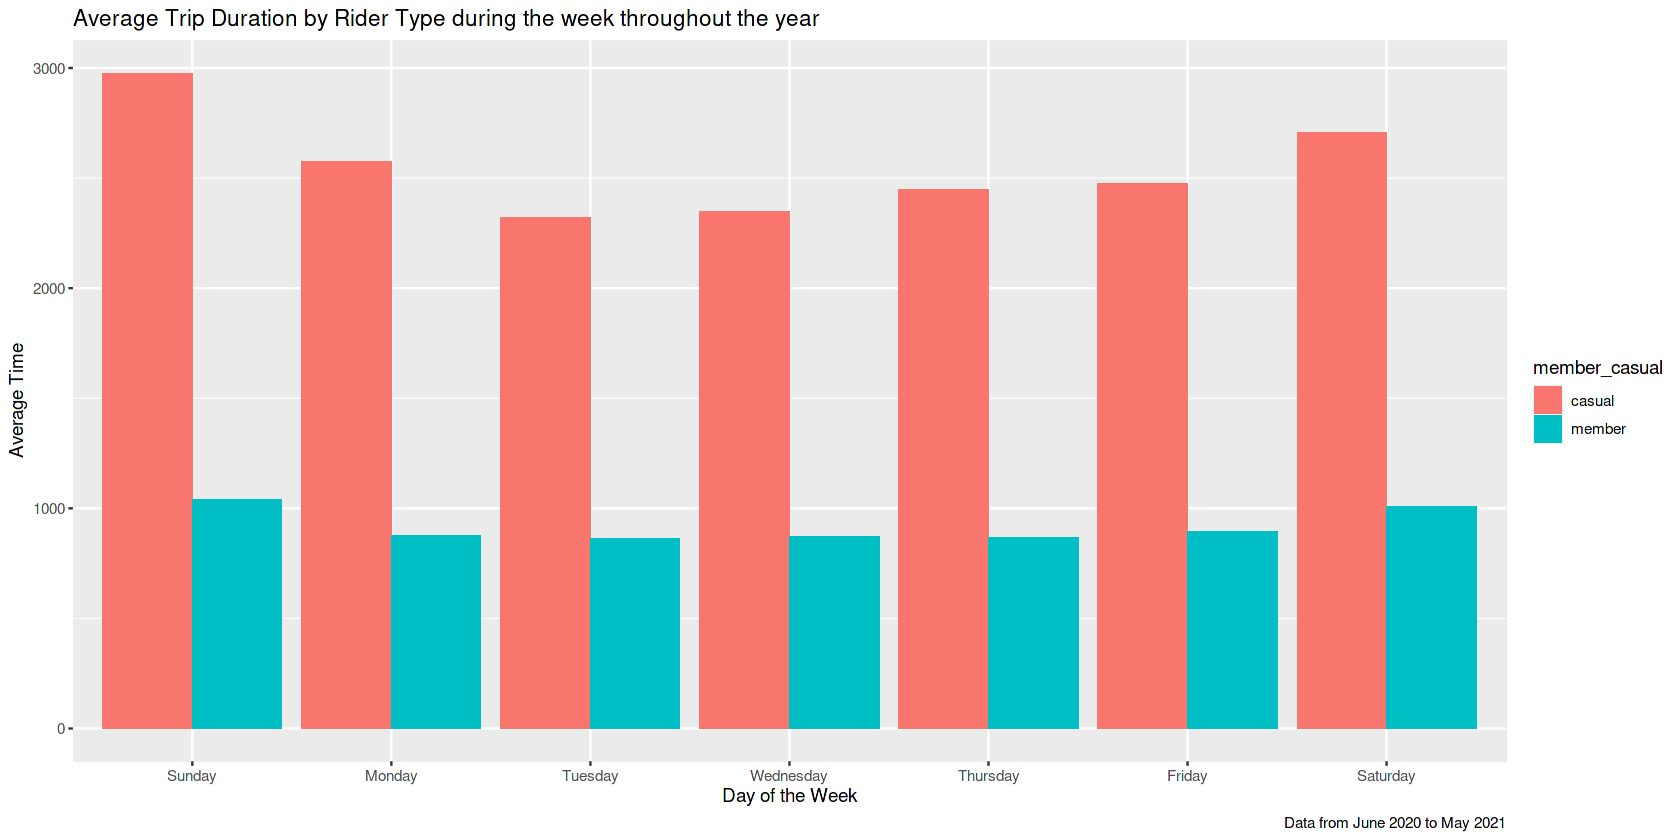

In [18]:
# Creating column charts comparing the average trip time by a casual rider and a member in a week
temp_data <- all_trips_v2 %>% group_by(member_casual, day_of_week) %>%
    summarize(mean_trip_duration = mean(trip_duration), .groups = "drop") %>%
    ggplot() + geom_col(mapping = aes(x = day_of_week, y = mean_trip_duration, fill = member_casual), position = "dodge")

temp_data + labs(title = "Average Trip Duration by Rider Type during the week throughout the year", caption = "Data from June 2020 to May 2021", x = "Day of the Week", y = "Average Time")

On average, a casual rider uses a bike for more duration in a day as compared to a cyclistic member even though the number of trips taken by a casual rider is less as compared to that by members in a weekday. The average time for members is almost same in the weekdays.

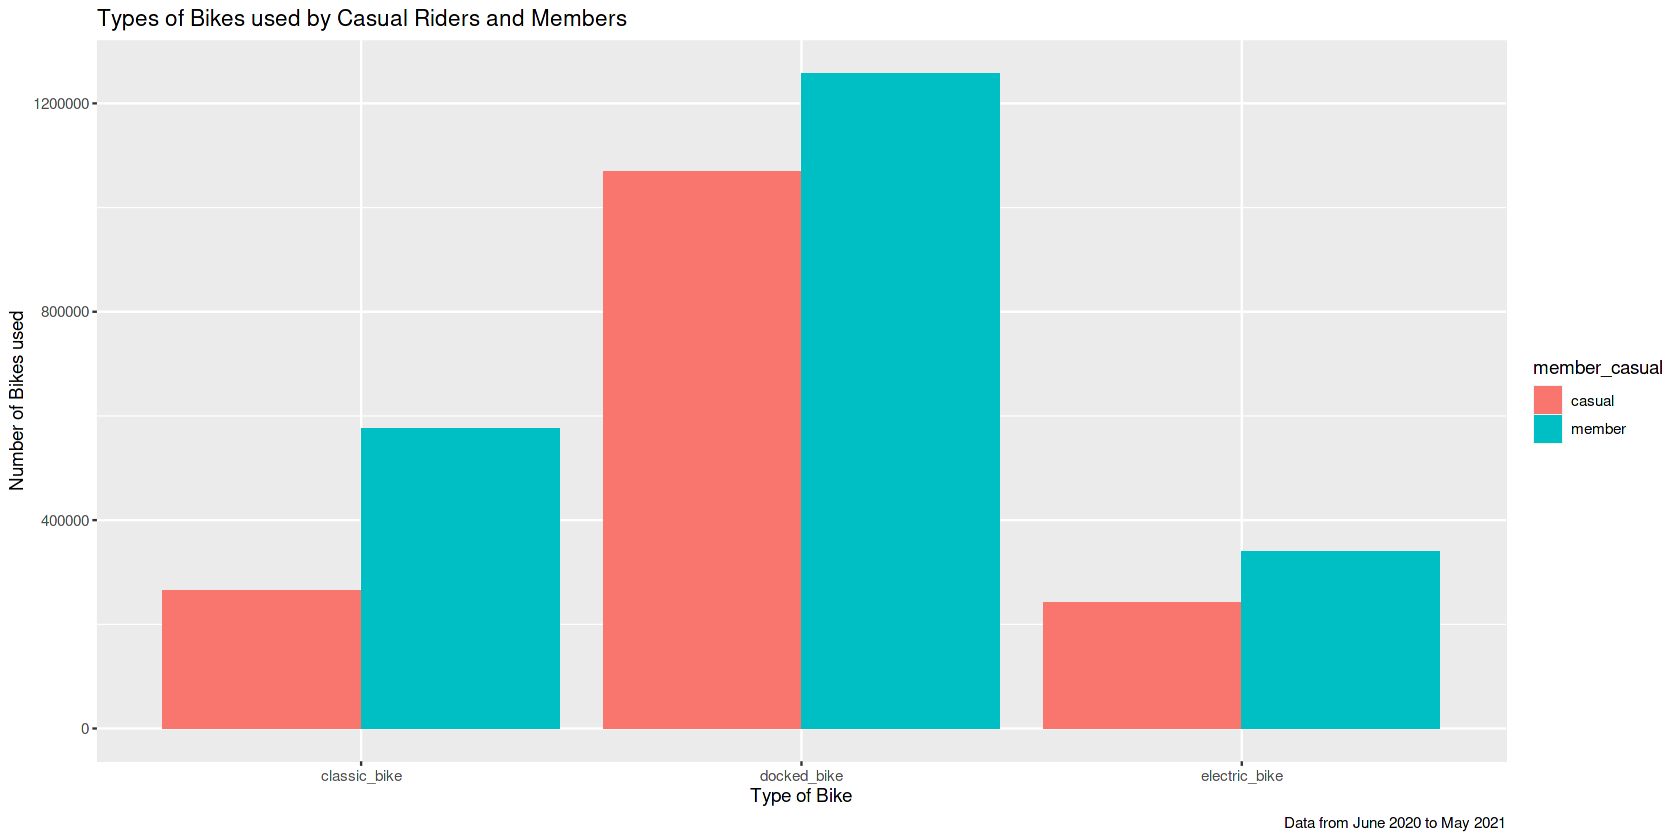

In [19]:
# Creating a plot to determine the most popular type of bike among casual riders and members
ggplot(data = all_trips_v2) + geom_bar(mapping = aes(x = rideable_type, fill = member_casual), position = "dodge") +
labs(title = "Types of Bikes used by Casual Riders and Members", caption = "Data from June 2020 to May 2021", x = "Type of Bike", y = "Number of Bikes used")

**Docked Bikes** are the clear winners here.

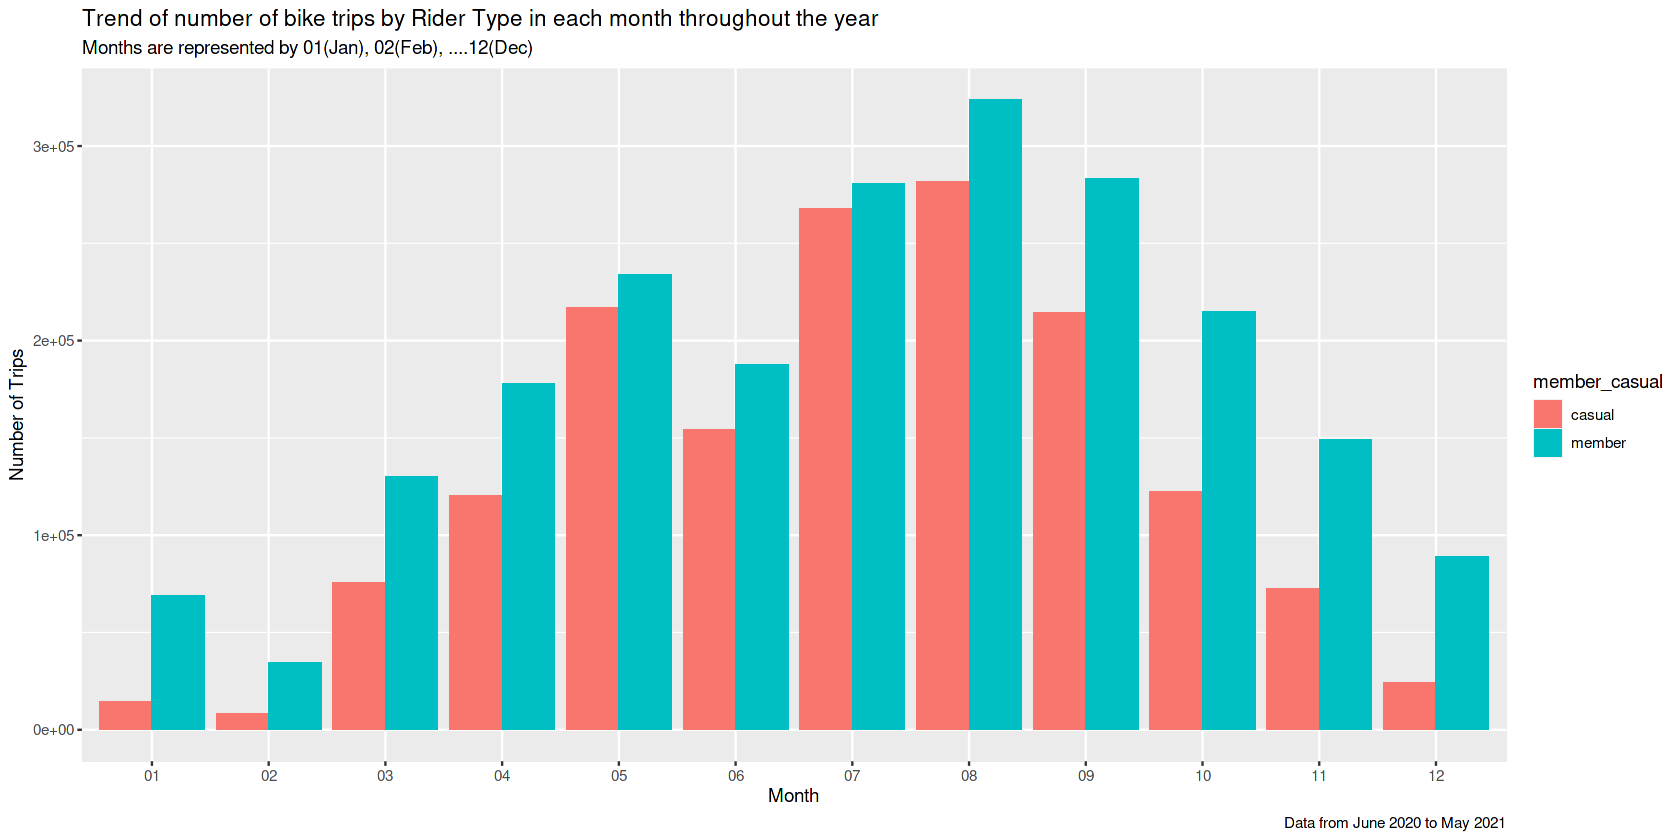

In [20]:
# Plot to show the trend of bike trips throughout the year.
temp_data2 <- all_trips_v2 %>% group_by(member_casual, month)%>%
    summarize(number_of_trips = n(), .groups = "drop") %>%
    arrange(month)%>%
    ggplot() + geom_col(mapping = aes(x = month, y = number_of_trips, fill = member_casual), position = "dodge")

temp_data2 + labs(title = "Trend of number of bike trips by Rider Type in each month throughout the year", subtitle = "Months are represented by 01(Jan), 02(Feb), ....12(Dec)", caption = "Data from June 2020 to May 2021", x = "Month", y = "Number of Trips")

Most number of bike trips took place in the month of August, 2020 in the period June 2020 - May 2021.

## Act Phase
**Now it's time to share my conclusions and insights that could help my team and business and also share some recommendations.**  
1) From the first viz. we can see that the number of trips taken by casual riders is high during the weekends and it decreases during the weekdays. Also, they ride the bikes for a longer period on an average as compared to members and there is no consistency in their trip durations. This implies that the casual riders use the bikes as a mode of recreation in their leisure time which is for most of the people in the weekend.  
2) We don't see a drastic change in the number of trips by members throughout the week and they are overall high. Also, the average trip duration stays more or less the same for the members during the weekday. This implies that the members use bikes for their daily commute to their office / work.  
3) Docked bikes are prefered by both members and casual riders
4) The period over which the analysis took place(June 2020 - May 2021), August 2020 was the busiest and attracted a lot of traffic.

### Recommendations  

To convert the casual riders into Cyclistic Members, I would recommend the following:
1) The company can offer discounts on bike rides on weekends if the casual riders become a member as casual riders prefer riding on the weekends so they would like this deal.  
2) The company should run promotions / offers on weekends as casual riders are present in large amounts on weekends so the conversion rate from casual riders to members will be higher.  
3) Even though more data is required and more analysis is needed to be done but if August is the busiest month of the year, the company should run all sorts of promotions throughout the month to attract casual riders to buy annual memberships.  
4) Advise the casual riders that they should take out time to ride bikes more often during the weekdays as it's good for their health and how buying a membership would save their money.   